# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv(".alpaca_api_keys.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_data = requests.get(btc_url).json()


# Fetch current ETH price
# YOUR CODE HERE!]
eth_data = requests.get(eth_url).json()


# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value=btc_data['data']['1']['quotes']['USD']['price']
my_eth_value=eth_data['data']['1027']['quotes']['USD']['price']


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $57758.00
The current value of your 5.3 ETH is $2058.36


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50


In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-04-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
# YOUR CODE HERE!

df_portfolio

AGG                                     SPY  \
                             open    high     low   close   volume   open   
time                                                                        
2021-04-01 00:00:00-04:00  113.93  114.05  113.83  114.02  9491702  398.4   

                                                             
                             high     low   close    volume  
time                                                         
2021-04-01 00:00:00-04:00  400.67  398.18  400.53  72713146

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.02
Current SPY closing price: $400.53


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $22804.00
The current value of your 50 SPY shares is $20026.50


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(index = ["crypto", "shares"], columns = ["amount"])
df_savings.loc["crypto"]["amount"] = my_btc_value + my_eth_value
df_savings.loc["shares"]["amount"] = my_agg_value + my_spy_value

# Display savings DataFrame
display(df_savings)

,amount
crypto,59816.4
shares,42830.5


<AxesSubplot:title={'center':'Asset Total Values'}, ylabel='amount'>

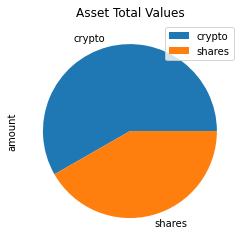

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title = "Asset Total Values")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3


# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = float(df_savings.loc["crypto"]["amount"] + df_savings.loc["shares"]["amount"])
deficit = emergency_fund - total_savings

# Validate saving health
# YOUR CODE HERE!

if total_savings > emergency_fund:
    print(f"Congratulations! Your total savings amount of ${total_savings} means that you have more than enough money in your emergency fund. Keep up the good work!")
elif total_savings == emergency_fund:
    print(f"Congratulations! You've finanlly reached your financial goal of having ${total_savings} in your emergency fund. You're killing it!")
elif total_savings < emergency_fund:
    print(f"You are currently ${deficit} away from your financial goal of having ${emergency_fund} in your emergency fund. Keep pushing, you're almost there!")
else:
    print("N/A")




Congratulations! Your total savings amount of $102646.86 means that you have more than enough money in your emergency fund. Keep up the good work!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_retirement_plan = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_retirement_plan.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2016-08-17 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145.0  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224.0  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907.0  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_thirtyyear = MCSimulation(
    portfolio_data = df_retirement_plan,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirtyyear.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-08-17 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2016-08-18 00:00:00-04:00     0.001110  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   

                                                    
                               volume daily_return  
time                                                
2016-08-17 00:00:00-04:00         NaN          NaN  
2016-08-18 00:00:00-04:00  42850145.0          NaN  
2016-08-19 00:00:00-04:00  52238224.0    -0.001371  
2016-08-22 00:00:00-04:00  48628907.0    -0.000320  
2016-08-23 00:00:00-04:00  41981207.0     0.002014

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006775,1.009385,1.015838,1.006201,0.998158,0.991421,0.990646,0.999987,1.005107,0.992887,...,1.003364,1.004364,0.991286,1.004034,1.004283,0.997313,1.002708,0.989019,0.990567,1.005466
2,0.999881,1.011405,1.021750,1.004313,1.006692,0.977977,0.998641,0.991430,1.024428,0.994811,...,1.021656,0.998781,0.990448,1.006956,1.002444,0.996696,0.997774,0.995387,1.004339,0.998206
3,1.005535,1.007984,1.014802,1.008950,1.005909,0.987721,1.002516,0.992044,1.025891,1.008519,...,1.016912,0.996054,1.010676,1.013015,0.992091,1.001574,0.989798,0.998508,1.003577,1.000436
4,1.019198,1.000814,1.019380,1.016354,0.999827,0.986003,1.006058,0.989294,1.040779,1.007253,...,1.007613,0.991994,1.012171,1.010333,0.992312,1.002844,0.992219,1.003671,1.006464,0.999845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,18.251524,8.134458,16.222416,6.546029,17.970337,35.126950,17.145555,8.018938,10.144796,21.106275,...,11.192425,5.784797,10.086000,15.478998,8.335800,20.391140,18.962014,6.137976,7.636173,19.825222
7557,18.004479,8.136397,16.247482,6.529455,18.022109,34.975805,17.037927,8.222446,10.152621,21.403959,...,11.184277,5.795820,10.136483,15.239152,8.317799,20.549808,18.838459,6.200778,7.661713,19.892681
7558,18.014315,8.159825,16.204389,6.501583,17.965007,34.779285,17.011965,8.226187,10.130623,21.571175,...,11.333999,5.789503,10.217427,14.964280,8.268054,20.569185,18.959289,6.202310,7.683254,19.653058
7559,17.959873,8.174476,16.052376,6.531063,17.838322,34.956663,17.030673,8.336148,10.140875,21.673616,...,11.353509,5.746124,10.306914,14.691098,8.339652,20.575850,18.867370,6.240113,7.751670,19.456105


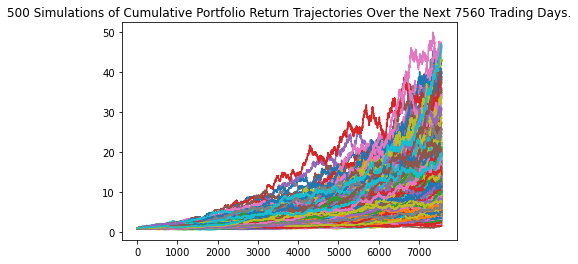

In [19]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot = MC_thirtyyear.plot_simulation()


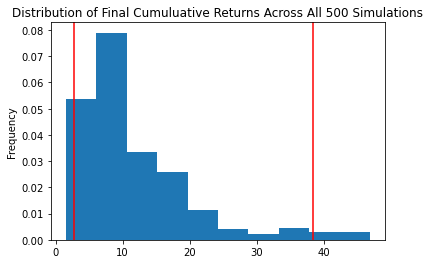

In [20]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot = MC_thirtyyear.plot_distribution()


### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)


count           500.000000
mean             11.724675
std               8.453049
min               1.530338
25%               6.136976
50%               9.275910
75%              14.770823
max              46.853867
95% CI Lower      2.805354
95% CI Upper     38.342794
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $56107.07 and $766855.88


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower2 = round(tbl[8]*initial_investment2,2)
ci_upper2 = round(tbl[9]*initial_investment2,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $56107.07 and $766855.88


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear = MCSimulation(
    portfolio_data = df_retirement_plan,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)


In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988589,0.988285,1.004720,1.007300,1.010017,1.003575,1.008564,0.991068,0.994447,1.000303,...,0.985838,0.992111,1.002371,0.997280,1.007578,1.001244,0.998303,0.995005,0.994685,1.006700
2,0.991318,0.985702,1.011292,1.000074,1.020418,1.007423,1.025253,0.991914,0.982308,1.013150,...,0.981411,0.984328,0.996923,1.005123,1.016170,0.999561,1.010061,1.003818,1.002947,1.005097
3,0.995253,0.991602,1.009477,0.998809,1.022221,1.014410,1.025597,0.995709,0.974207,1.012267,...,0.986652,0.977166,0.996770,1.010547,1.032496,1.003614,1.006263,1.005340,1.008152,1.007060
4,0.978639,1.001680,1.016464,1.002437,1.038295,1.021040,1.037577,0.996853,0.979470,1.013481,...,0.995850,0.963764,0.988575,1.002043,1.030707,1.001241,1.003754,1.027174,1.001978,0.998578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.272062,0.974744,1.736420,1.476572,1.364017,2.874321,1.529245,1.258887,1.580861,1.677208,...,1.178254,1.266876,0.973194,1.290206,1.496630,1.344608,1.377253,2.434439,1.693170,1.533617
1257,1.273749,0.972614,1.739927,1.483910,1.374960,2.861378,1.517232,1.245156,1.585721,1.684371,...,1.195631,1.271258,0.966548,1.301014,1.494482,1.316903,1.375601,2.419249,1.688846,1.540014
1258,1.252683,0.974808,1.750598,1.511411,1.369147,2.877024,1.521967,1.244973,1.579956,1.692728,...,1.193946,1.267931,0.964385,1.296742,1.513862,1.328148,1.352553,2.413929,1.687114,1.558586
1259,1.256332,0.984207,1.749144,1.504259,1.385060,2.865098,1.526887,1.235120,1.558790,1.686620,...,1.204996,1.259834,0.964254,1.283251,1.529210,1.348382,1.363742,2.424326,1.690705,1.566947


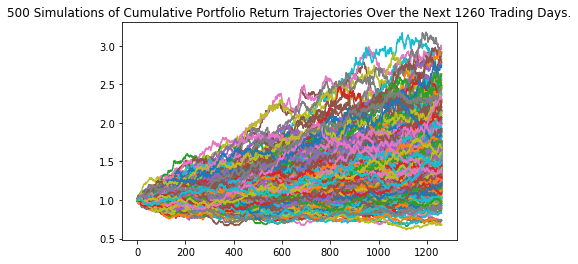

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot2 = MC_fiveyear.plot_simulation()


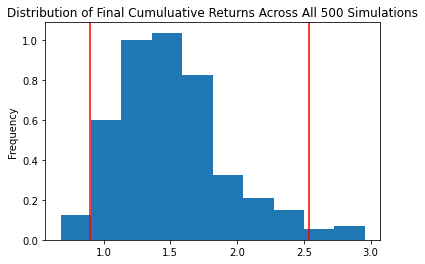

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot2 = MC_fiveyear.plot_distribution()


In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

tbl5 = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!

print(tbl5)

count           500.000000
mean              1.516123
std               0.413080
min               0.677506
25%               1.223429
50%               1.446151
75%               1.711689
max               2.957753
95% CI Lower      0.896318
95% CI Upper      2.537919
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!
initial_investment5 = 100000


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl5[8]*initial_investment5,2)
ci_upper_five = round(tbl5[9]*initial_investment5,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $89631.76 and $253791.92


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

MC_tenyear = MCSimulation(
    portfolio_data = df_retirement_plan,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)


In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

MC_tenyear.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007386,0.985983,1.002458,0.999860,0.992585,1.008760,1.006406,1.005184,1.002724,0.991852,...,1.003142,0.993632,0.994428,0.999157,1.007016,0.998324,1.008904,1.001852,0.990363,1.006494
2,1.006406,0.986952,0.997825,1.013813,0.987343,1.012066,1.000765,1.009117,1.008921,0.988828,...,1.007140,0.996517,0.992805,1.003004,1.016528,1.000487,1.004414,1.001192,0.986685,1.001218
3,0.992949,0.989702,0.997088,1.018750,0.984306,1.000074,0.991017,1.016372,0.996529,0.993319,...,1.004806,0.993322,0.988237,1.004735,1.015237,1.005625,0.997539,0.998373,0.994058,0.985182
4,1.004124,0.985341,0.989301,1.016629,0.994843,1.003650,0.993785,1.025315,0.993316,0.993279,...,1.011046,1.003557,0.995125,1.001959,1.022142,1.006165,1.003142,0.999901,0.991393,0.970377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.357203,2.396079,2.754048,2.827948,1.436759,1.148047,1.501272,2.165239,2.068111,2.218217,...,2.389646,1.972106,2.420247,3.294426,3.035679,1.307071,4.330479,1.733802,1.625500,1.239613
2517,2.343089,2.409186,2.754915,2.816096,1.439610,1.152312,1.502487,2.159605,2.046863,2.243979,...,2.388392,1.990473,2.418812,3.282113,3.027073,1.301500,4.347599,1.756782,1.601262,1.235488
2518,2.355909,2.389313,2.754744,2.822027,1.426010,1.138485,1.500601,2.163750,2.051790,2.262334,...,2.395669,1.993936,2.416003,3.271947,3.009870,1.306862,4.302239,1.747020,1.592446,1.232545
2519,2.349967,2.358410,2.717178,2.802308,1.426044,1.146841,1.509060,2.175789,2.037510,2.260149,...,2.409468,2.021260,2.437130,3.306133,3.054693,1.302099,4.341311,1.765186,1.608091,1.231272


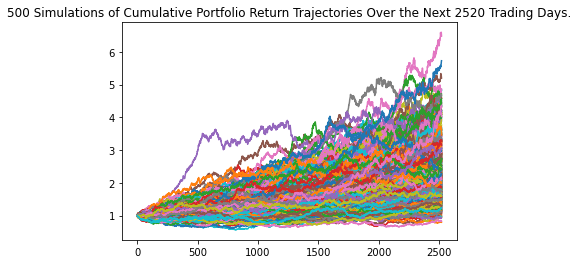

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot10 = MC_tenyear.plot_simulation()

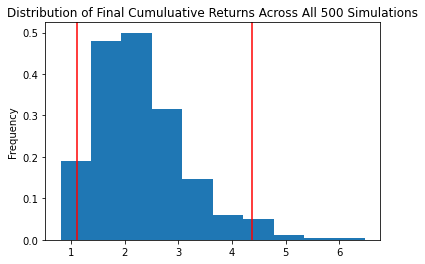

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot10 = MC_tenyear.plot_distribution()


In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl10 = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl10)

count           500.000000
mean              2.291966
std               0.853258
min               0.798172
25%               1.667341
50%               2.161625
75%               2.736591
max               6.481845
95% CI Lower      1.113881
95% CI Upper      4.373761
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!
initial_investment10 = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl10[8]*initial_investment10,2)
ci_upper_ten = round(tbl10[9]*initial_investment10,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $55694.03 and $218688.05
